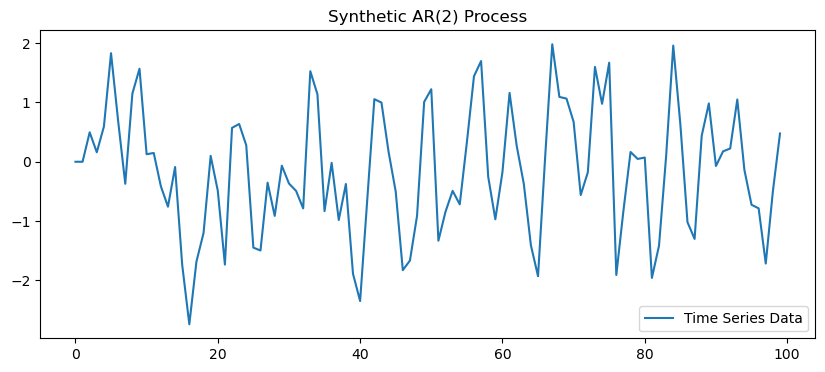

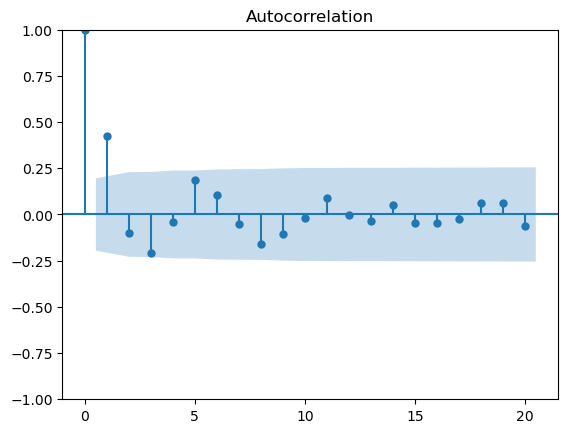

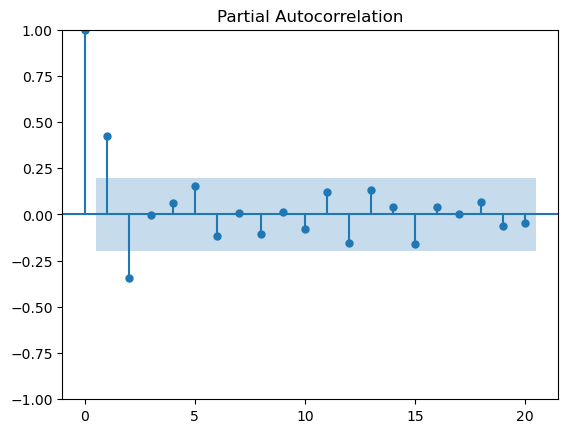

AR Model Coefficients: const   -0.114887
y.L1     0.577764
y.L2    -0.351075
dtype: float64
Forecasted Values: [ 0.33580684 -0.08839781 -0.28385332 -0.24785279 -0.15843343]


In [47]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Generate synthetic AR(2) time series data
np.random.seed(42)
n = 100
y = [0] * n
phi1, phi2 = 0.6, -0.3  # AR coefficients

for t in range(2, n):
    y[t] = phi1 * y[t-1] + phi2 * y[t-2] + np.random.normal(0, 1)

# Convert to Pandas Series
series = pd.Series(y)

# Plot time series
plt.figure(figsize=(10,4))
plt.plot(series, label="Time Series Data")
plt.title("Synthetic AR(2) Process")
plt.legend()
plt.show()

# Plot ACF and PACF
plot_acf(series, lags=20)
plot_pacf(series, lags=20)
plt.show()

# Fit an AR(2) model
model = AutoReg(series, lags=2)
model_fit = model.fit()

# Print model coefficients
print("AR Model Coefficients:", model_fit.params)

# Forecast next 5 values
forecast = model_fit.predict(start=len(series), end=len(series)+4)
print("Forecasted Values:", forecast.values)


In [48]:
# Listing 3-1 Describing a dataframe
import pandas as pd
# Import the dataframe
eq = pd.read_csv('~/Downloads/Ch03_Earthquake_database.csv')


# Describe the dataframe
eq.describe()


,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


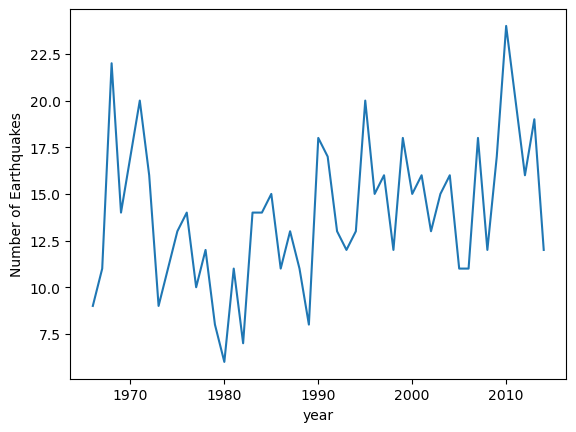

In [49]:
# Listing 3-3 Convert the earthquake data to the yearly number of earthquakes

import matplotlib.pyplot as plt
# Convert years to dates
# eq['year'] = pd.to_datetime(eq['Date']).dt.year   # Original code

# eq['year'] = pd.to_datetime(eq['Date'], format='%Y-%m-%dT%H:%M:%S.%fZ').dt.year # First Attempt fix, 

# eq['year'] = pd.to_datetime(eq['Date'], format='mixed').dt.year   # Second Attempt fix

eq['Date'] = pd.to_datetime(eq['Date'], errors='coerce')  # Convert to datetime (Third Attempt)
eq['year'] = eq['Date'].dt.year  # Extract year

# Filter on earthquakes with magnitude of 7 or higher
eq = eq[eq['Magnitude'] >= 7]
# Compute a count of earthquakes per year
earthquakes_per_year = eq.groupby('year').count()
# Remove erroneous values for year”

earthquakes_per_year = earthquakes_per_year.iloc[1:-2, 0]
# Make a plot of earthquakes per year
ax = earthquakes_per_year.plot()
ax.set_ylabel("Number of Earthquakes")
plt.show()


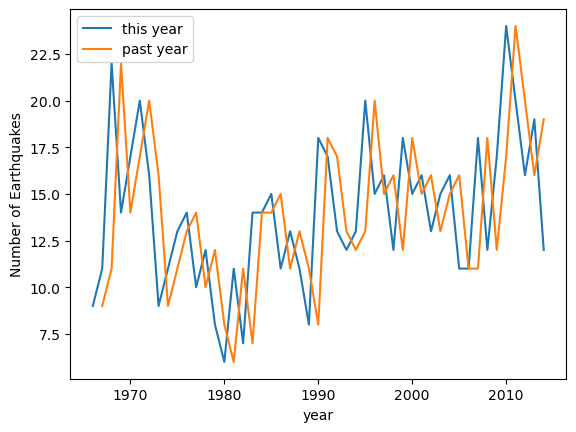

In [50]:
# Listing 3-4 Plotting the shifted data”

shifts = pd.DataFrame(
    {'this year': earthquakes_per_year,
     'past year': earthquakes_per_year.shift(1)}
)
ax = shifts.plot()
ax.set_ylabel('Number of Earthquakes')
plt.show()


In [53]:
shifts = shifts.dropna()

In [54]:
shifts.corr()

,this year,past year
this year,1.000000,0.313667
past year,0.313667,1.000000


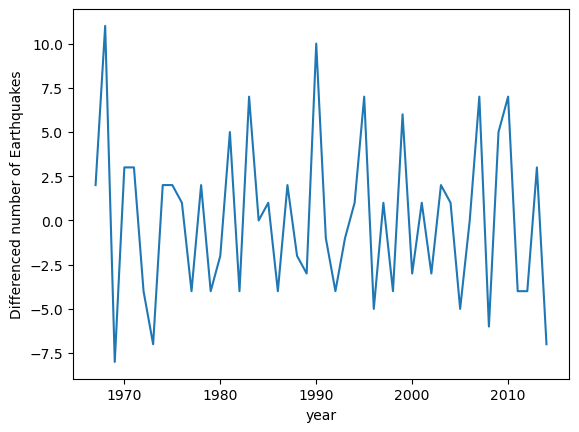

In [55]:
# Difference the data
differenced_data = earthquakes_per_year.diff().dropna()

# Plot the differenced data
ax = differenced_data.plot()
ax.set_ylabel('Differenced number of Earthquakes')
plt.show()


coefficients:  [0.51636104 0.34981679 0.08922855]
sigma:  3.99051873543974
48
58


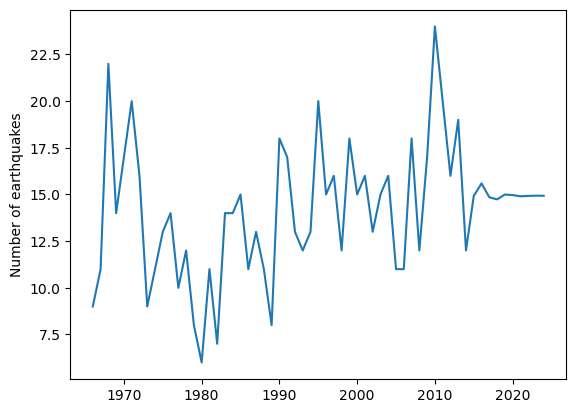

In [56]:
from statsmodels.regression.linear_model import yule_walker
coefficients, sigma = yule_walker(differenced_data, order = 3)
print('coefficients: ', -coefficients)
print('sigma: ', sigma)

# Make a list of differenced values
val_list = list(differenced_data)
# print(val_list)
print(len(val_list))
# Reverse the list so that the order corresponds with the order of the coefficients
val_list.reverse()# Define the number of years to predict
# print(val_list)
n_steps = 10

# For each year to predict
for i in range(n_steps):
    # Compute the new value as the sum of lagged values multiplied 
    # by their corresponding coefficient    
    new_val = 0
    for j in range(len(coefficients)):
        new_val += coefficients[j] * val_list[j]
    # Insert the new value at the beginning of the list    
    val_list.insert(0, new_val)
# Redo the reverse to have the order of time
val_list.reverse()
print(len(val_list))
# Add the original first value back into the list and do a cumulative sum to undo the differencing
val_list = [earthquakes_per_year.values[0]] + val_list
new_val_list = pd.Series(val_list).cumsum()
# Plot the newly obtained list
# plt.plot(range(1966, 2025), new_val_list)
# plt.plot(range(1970, 2010), new_val_list)

plt.plot(range(1966, 1966 + len(new_val_list)), new_val_list)

plt.ylabel('Number of earthquakes')
plt.show()




In [ ]:
print(val_list)

In [ ]:
print(len(new_val_list))


In [ ]:
plt.plot(range(1970, 1970 + len(new_val_list)), new_val_list)

In [ ]:
plt.plot(range(1966, 1966+len(new_val_list)), new_val_list)

In [ ]:
print('coefficients: ', coefficients)

Test R2: 0.1338715328132314


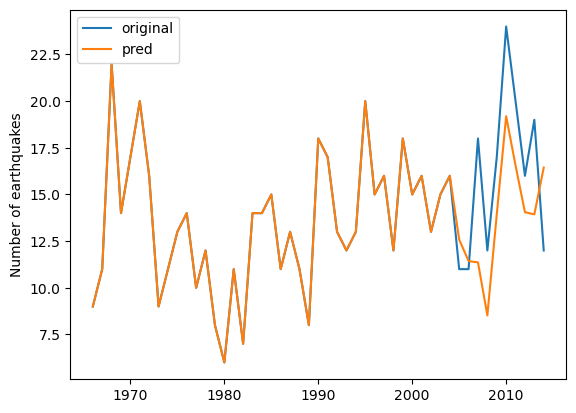

In [112]:
#“Listing 3-14 Fit the model on a train set and evaluate it on a test set”

# P. 110

from sklearn.metrics import r2_score
train = list(differenced_data)[:-10]
test = list(earthquakes_per_year)[-10:]
# coefficients, sigma = yule_walker(train, order = 3)
coefficients, sigma = yule_walker(train, order = 19) # Order 19 is best for r^2 

val_list = list(train)
# Reverse the list so that the order corresponds with the order of the coefficients
val_list.reverse()# Define the number of years to predict
n_steps = 10

# For each year to predict
for i in range(n_steps):
    # Compute the new value as the sum of lagged values multiplied by their corresponding coefficient    
    new_val = 0
    for j in range(len(coefficients)):
        new_val += coefficients[j] * val_list[j]
    # Insert the new value at the beginning of the list
    val_list.insert(0, new_val)

  
# Redo the reverso to have the order of time
val_list.reverse()

# Add the original first value back into the list and do a cumulative sum to undo the differencing
# val_list = [earthquakes_per_year[0]] + val_list   # THIS CAUSED ERROR KeyError: 0
# val_list = [earthquakes_per_year.index[0]] + val_list # THIS IS NOT WE WANT
val_list = [earthquakes_per_year.iloc[0]] + val_list # THIS IS CORRECT

new_val_list = pd.Series(val_list).cumsum()
# Plot the newly obtained list
validation = pd.DataFrame({'original': earthquakes_per_year.reset_index(drop=True),'pred': new_val_list })
print('Test R2:', r2_score(validation.iloc[-10:, 0], validation.iloc[-10:, 1]))
# Plot the newly obtained list
plt.plot(range(1966, 2015), validation)
plt.legend(validation.columns)
plt.ylabel('Number of earthquakes')
plt.show()

In [103]:
#“Listing 3-15 Apply a grid search to find the order that gives the best R2 score on the test data

def evaluate(order):
    train = list(differenced_data)[:-10]
    test = list(earthquakes_per_year)[-10:]
    coefficients, sigma = yule_walker(train, order = order)
    # Make a list of differenced values
    val_list = list(train)
    # Reverse the list to corresponds with the order of coefs
    val_list.reverse()
    # Define the number of years to predict    
    n_steps = 10
    # For each year to predict   
    for i in range(n_steps):
        # Compute the new value
        new_val = 0
        for j in range(len(coefficients)):
            new_val += coefficients[j] * val_list[j]
        # Insert the new value at the beginning of the list
        val_list.insert(0, new_val)
            
    val_list.reverse()
    # Undo the differencing with a cumsum    
    val_list = [earthquakes_per_year.iloc[0]] + val_list
    new_val_list = pd.Series(val_list).cumsum()
    # Plot the newly obtained list
    validation = pd.DataFrame({'original': earthquakes_per_year.reset_index(drop=True),'pred': new_val_list })
    return r2_score(validation.iloc[-10:, 0], validation.iloc[-10:, 1])

# For each order between 1 and 30, fit and evaluate the model
orders = []
r2scores = []
for order in range(1, 31):
    orders.append(order)
    r2scores.append(evaluate(order))
# Create a results data frame
results =pd.DataFrame({'orders': orders,'scores': r2scores})
# Show the order with best R2 score
results[results['scores'] == results.max()['scores']]



,orders,scores
18,19,0.133872


In [105]:
print(results)


    orders        scores
0        1 -1.746669e-03
1        2 -8.879904e-03
2        3 -4.034670e-02
3        4 -4.273103e-02
4        5 -3.057020e-02
5        6 -5.835184e-02
6        7 -5.733247e-02
7        8 -7.145201e-02
8        9 -7.338868e-02
9       10 -8.458094e-02
10      11 -3.809426e-02
11      12 -1.262095e-01
12      13 -9.509355e-02
13      14 -1.151803e-01
14      15  1.168358e-02
15      16  2.051764e-02
16      17 -9.992096e-03
17      18 -1.170240e-01
18      19  1.338715e-01
19      20 -1.705618e+04
20      21 -2.430352e+08
21      22 -2.017253e+04
22      23 -7.908362e+01
23      24 -1.945142e+01
24      25 -2.237128e+00
25      26 -6.717378e+00
26      27 -8.253426e-01
27      28 -7.134188e+03
28      29 -2.705363e+05
29      30 -2.350845e+08


In [29]:
# from pandas_datareader import data as pdr
# import yfinance

# data = pdr.get_data_yahoo('AAPL', start='2019-01-01', end='2019-12-31')

# data = data['Close']


# import yfinance as yf

# # Fetch data for Apple (AAPL)
# data = yf.download('CUBI', start='2019-01-01', end='2019-12-31')

# # Extract the 'Close' column
# data = data['Close']

# # Print the result
# print(data)



from pandas_datareader import data as pdr
import yfinance

# Patch pandas_datareader to use yfinance
yfinance.pdr_override()

# Fetch data for Apple (AAPL)
data = pdr.get_data_yahoo('UPC', start='2019-01-01', end='2019-12-31')

# Extract the 'Close' column
data = data['Close']

# Print the result
print(data)

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): query2.finance.yahoo.com:443
DEBUG:urllib3.connectionpool:https://query2.finance.yahoo.com:443 "GET /v8/finance/chart/UPC?range=1d&interval=1d HTTP/11" 429 23
ERROR    Failed to get ticker 'UPC' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:Failed to get ticker 'UPC' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed

ERROR    
         1 Failed download:
ERROR:yfinance:
1 Failed download:
ERROR    ['UPC']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:['UPC']: Exception('%ticker%: No timezone found, symbol may be delisted')



Series([], Name: Close, dtype: float64)


In [44]:
import yfinance as yf
import time

# Patch pandas_datareader to use yfinance (optional)
yf.pdr_override()

# Fetch data for Apple (AAPL)
try:
    data = yf.download('AAPL', start='2019-01-01', end='2019-12-31')
    if data.empty:
        print("No data returned. Possible rate limit issue.")
    else:
        print(data['Close'])  # Extract the 'Close' column
except Exception as e:
    print(f"Error: {e}")

# Add a delay to avoid rate limiting
time.sleep(5)

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): query2.finance.yahoo.com:443
DEBUG:urllib3.connectionpool:https://query2.finance.yahoo.com:443 "GET /v8/finance/chart/AAPL?range=1d&interval=1d HTTP/11" 429 23
ERROR    Failed to get ticker 'AAPL' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:Failed to get ticker 'AAPL' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed

ERROR    
         1 Failed download:
ERROR:yfinance:
1 Failed download:
ERROR    ['AAPL']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:['AAPL']: Exception('%ticker%: No timezone found, symbol may be delisted')



No data returned. Possible rate limit issue.


In [45]:
import time
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

ticker = "AAPL"  # Replace with a correct ticker

for attempt in range(5):  # Retry up to 5 times
    try:
        data = pdr.get_data_yahoo(ticker, start="2019-01-01", end="2019-12-31")
        if not data.empty:
            print(data["Close"])
        else:
            print(f"No data found for {ticker}")
        break  # Exit loop if successful
    except Exception as e:
        print(f"Attempt {attempt + 1}: Error fetching data - {e}")
        time.sleep(10)  # Wait 10 seconds before retrying


DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): query2.finance.yahoo.com:443
DEBUG:urllib3.connectionpool:https://query2.finance.yahoo.com:443 "GET /v8/finance/chart/AAPL?range=1d&interval=1d HTTP/11" 429 23
ERROR    Failed to get ticker 'AAPL' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:Failed to get ticker 'AAPL' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed

ERROR    
         1 Failed download:
ERROR:yfinance:
1 Failed download:
ERROR    ['AAPL']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:['AAPL']: Exception('%ticker%: No timezone found, symbol may be delisted')



No data found for AAPL


In [12]:
import yfinance as yf
import logging

# Assuming debug mode was enabled earlier
print(yf.__version__)  # Just to check your version

# Get the yfinance logger and set it to a higher level
yf_logger = logging.getLogger('yfinance')
yf_logger.setLevel(logging.INFO)  # Or logging.WARNING to suppress more

print("Debug mode disabled")

# Test it
msft = yf.Ticker('AAPL')
print(msft.info)

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): query2.finance.yahoo.com:443


0.2.28
Debug mode disabled


DEBUG:urllib3.connectionpool:https://query2.finance.yahoo.com:443 "GET /v6/finance/quoteSummary/AAPL?modules=financialData&modules=quoteType&modules=defaultKeyStatistics&modules=assetProfile&modules=summaryDetail&ssl=true HTTP/11" 429 23


HTTPError: 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v6/finance/quoteSummary/AAPL?modules=financialData&modules=quoteType&modules=defaultKeyStatistics&modules=assetProfile&modules=summaryDetail&ssl=true

In [13]:
# data = pdr.get_data_yahoo('MSFT', start='2019-01-01', end='2019-12-31')
# data = data['Close']

import yfinance as yf
from datetime import datetime

# Define dates
start = '2019-01-01'
end = '2019-12-31'

# Fetch MSFT data with yfinance
data = yf.download('MSFT', start=start, end=end)

# Grab just the Close prices
data = data['Close']

# Peek at it
print(data.head())

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): query2.finance.yahoo.com:443
DEBUG:urllib3.connectionpool:https://query2.finance.yahoo.com:443 "GET /v8/finance/chart/MSFT?range=1d&interval=1d HTTP/11" 429 23
ERROR    Failed to get ticker 'MSFT' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:Failed to get ticker 'MSFT' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed

ERROR    
         1 Failed download:
ERROR:yfinance:
1 Failed download:
ERROR    ['MSFT']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:['MSFT']: Exception('%ticker%: No timezone found, symbol may be delisted')



Series([], Name: Close, dtype: float64)


In [35]:
import yfinance as yf

ticker = "SPY"
data = yf.Ticker(ticker)
print(data.info)  # Inspect all available information

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): query2.finance.yahoo.com:443
DEBUG:urllib3.connectionpool:https://query2.finance.yahoo.com:443 "GET /v6/finance/quoteSummary/SPY?modules=financialData&modules=quoteType&modules=defaultKeyStatistics&modules=assetProfile&modules=summaryDetail&ssl=true HTTP/11" 429 23


HTTPError: 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v6/finance/quoteSummary/SPY?modules=financialData&modules=quoteType&modules=defaultKeyStatistics&modules=assetProfile&modules=summaryDetail&ssl=true

In [122]:
import yfinance as yf

data = yf.download('MSFT', start='2019-01-01', end='2019-12-31')
print(data['Close'].head())


Failed to get ticker 'MSFT' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['MSFT']: Exception('%ticker%: No timezone found, symbol may be delisted')



Series([], Name: Close, dtype: float64)


In [15]:
import yfinance as yf

# Download historical data for a stock
data = yf.download("AAPL", start="2023-01-01", end="2023-10-01")
print(data)

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): query2.finance.yahoo.com:443
DEBUG:urllib3.connectionpool:https://query2.finance.yahoo.com:443 "GET /v8/finance/chart/AAPL?range=1d&interval=1d HTTP/11" 429 23
ERROR    Failed to get ticker 'AAPL' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:Failed to get ticker 'AAPL' reason: Expecting value: line 1 column 1 (char 0)


[*********************100%%**********************]  1 of 1 completed

ERROR    
         1 Failed download:
ERROR:yfinance:
1 Failed download:
ERROR    ['AAPL']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance:['AAPL']: Exception('%ticker%: No timezone found, symbol may be delisted')



Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []


In [124]:
import yfinance as yf

aapl = yf.Ticker('AAPL')  # Try Apple
print(aapl.info)

HTTPError: 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v6/finance/quoteSummary/AAPL?modules=financialData&modules=quoteType&modules=defaultKeyStatistics&modules=assetProfile&modules=summaryDetail&ssl=true

In [125]:
import yfinance as yf
import logging

# Turn on debug logging
logging.basicConfig(level=logging.DEBUG)

msft = yf.Ticker('MSFT')
print(msft.info)

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): query2.finance.yahoo.com:443
DEBUG:urllib3.connectionpool:https://query2.finance.yahoo.com:443 "GET /v6/finance/quoteSummary/MSFT?modules=financialData&modules=quoteType&modules=defaultKeyStatistics&modules=assetProfile&modules=summaryDetail&ssl=true HTTP/11" 429 23


HTTPError: 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v6/finance/quoteSummary/MSFT?modules=financialData&modules=quoteType&modules=defaultKeyStatistics&modules=assetProfile&modules=summaryDetail&ssl=true

In [126]:
import yfinance as yf

yf.enable_debug_mode()
msft = yf.Ticker('MSFT')
try:
    info = msft.info
    print(info)
except Exception as e:
    print(f"Caught: {e}")

AttributeError: 'IndentLoggerAdapter' object has no attribute 'handlers'

In [40]:
import pandas_datareader as pdr
import datetime

start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2019, 12, 31)

# Try FRED (Federal Reserve) or another API
# data = pdr.get_data_fred('SP500', start=start, end=end)  # S&P 500 as a test
# data = pdr.get_data_fred('DGS10', start=start, end=end)  # 10-Year Treasury Yield  as a test
# data = pdr.get_data_fred('CES0500000003', start=start, end=end)  # Hourly Earnings 
data = pdr.get_data_fred('DEXUSEU', start=start, end=end)  # Exchange Rates (USD to EUR

print(data.head())




DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): fred.stlouisfed.org:443
DEBUG:urllib3.connectionpool:https://fred.stlouisfed.org:443 "GET /graph/fredgraph.csv?id=DEXUSEU HTTP/11" 200 31489


            DEXUSEU
DATE               
2019-01-01      NaN
2019-01-02   1.1357
2019-01-03   1.1399
2019-01-04   1.1410
2019-01-07   1.1468


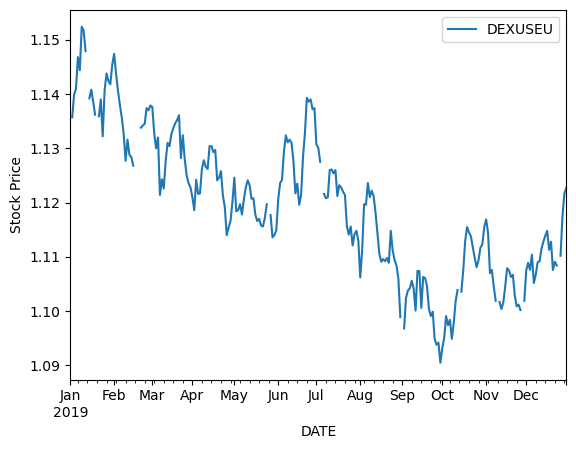

In [41]:
import matplotlib.pyplot as plt
ax = data.plot()
ax.set_ylabel("Stock Price")
plt.show()


In [128]:
import pandas_datareader as pdr
import datetime

start = datetime.datetime(2019, 1, 1)
end = datetime.datetime(2019, 12, 31)

# Try FRED (Federal Reserve) or another API
data = pdr.get_data_fred('SP500', start=start, end=end)  # S&P 500 as a test
print(data.head())

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): fred.stlouisfed.org:443
DEBUG:urllib3.connectionpool:https://fred.stlouisfed.org:443 "GET /graph/fredgraph.csv?id=SP500 HTTP/11" 200 15652


              SP500
DATE               
2019-01-01      NaN
2019-01-02  2510.03
2019-01-03  2447.89
2019-01-04  2531.94
2019-01-07  2549.69


In [129]:
import yfinance as yf

# Test ticker fetch with debug
yf.enable_debug_mode()

msft = yf.Ticker('MSFT')
try:
    info = msft.info
    print("MSFT Info:", info)
except Exception as e:
    print(f"Error: {e}")

# Try download
try:
    data = yf.download('MSFT', start='2019-01-01', end='2019-12-31')
    print(data['Close'].head())
except Exception as e:
    print(f"Download Error: {e}")

AttributeError: 'IndentLoggerAdapter' object has no attribute 'handlers'

In [130]:
import yfinance as yf
print(yf.__version__)

0.2.28


In [131]:
import yfinance as yf

msft = yf.Ticker('MSFT')
try:
    info = msft.info
    print("MSFT Info:", info)
except Exception as e:
    print(f"Error: {e}")

# Download test
data = yf.download('MSFT', start='2019-01-01', end='2019-12-31')
print(data['Close'].head())

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): query2.finance.yahoo.com:443
DEBUG:urllib3.connectionpool:https://query2.finance.yahoo.com:443 "GET /v6/finance/quoteSummary/MSFT?modules=financialData&modules=quoteType&modules=defaultKeyStatistics&modules=assetProfile&modules=summaryDetail&ssl=true HTTP/11" 429 23
DEBUG    Entering download()
DEBUG:yfinance:Entering download()
DEBUG     Disabling multithreading because DEBUG logging enabled
DEBUG:yfinance: Disabling multithreading because DEBUG logging enabled
DEBUG     Entering history()
DEBUG:yfinance: Entering history()
DEBUG      Entering _fetch_ticker_tz()
DEBUG:yfinance:  Entering _fetch_ticker_tz()
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): query2.finance.yahoo.com:443


Error: 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v6/finance/quoteSummary/MSFT?modules=financialData&modules=quoteType&modules=defaultKeyStatistics&modules=assetProfile&modules=summaryDetail&ssl=true


DEBUG:urllib3.connectionpool:https://query2.finance.yahoo.com:443 "GET /v8/finance/chart/MSFT?range=1d&interval=1d HTTP/11" 429 23
ERROR       Failed to get ticker 'MSFT' reason: Expecting value: line 1 column 1 (char 0)
ERROR:yfinance:   Failed to get ticker 'MSFT' reason: Expecting value: line 1 column 1 (char 0)
DEBUG      Exiting _fetch_ticker_tz()
DEBUG:yfinance:  Exiting _fetch_ticker_tz()
ERROR     
          1 Failed download:
ERROR:yfinance: 
 1 Failed download:
ERROR     ['MSFT']: Exception('%ticker%: No timezone found, symbol may be delisted')
ERROR:yfinance: ['MSFT']: Exception('%ticker%: No timezone found, symbol may be delisted')
DEBUG     ['MSFT']: Traceback (most recent call last):
            File "/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/yfinance/multi.py", line 275, in _download_one
              data = Ticker(ticker, session=session).history(
            File "/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/yfinance

Series([], Name: Close, dtype: float64)


In [132]:
import yfinance as yf
import logging

logging.basicConfig(level=logging.INFO)  # INFO instead of DEBUG avoids adapter clash
logger = logging.getLogger('yfinance')
logger.setLevel(logging.INFO)

msft = yf.Ticker('MSFT')
print(msft.info)

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): query2.finance.yahoo.com:443
DEBUG:urllib3.connectionpool:https://query2.finance.yahoo.com:443 "GET /v6/finance/quoteSummary/MSFT?modules=financialData&modules=quoteType&modules=defaultKeyStatistics&modules=assetProfile&modules=summaryDetail&ssl=true HTTP/11" 429 23


HTTPError: 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v6/finance/quoteSummary/MSFT?modules=financialData&modules=quoteType&modules=defaultKeyStatistics&modules=assetProfile&modules=summaryDetail&ssl=true

In [3]:
import yfinance as yf

print(yf.__version__)  # Confirm 0.2.28
yf.enable_debug_mode()  # Should work!
print("Debug mode enabled")

msft = yf.Ticker('APPL')
print(msft.info)

0.2.28


AttributeError: 'IndentLoggerAdapter' object has no attribute 'handlers'

In [4]:
import yfinance as yf
import logging

print(yf.__version__)
# Manually set up logging
logging.basicConfig(level=logging.DEBUG)
logger = logging.getLogger('yfinance')
logger.setLevel(logging.DEBUG)

msft = yf.Ticker('AAPL')
print(msft.info)

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): query2.finance.yahoo.com:443


0.2.28


DEBUG:urllib3.connectionpool:https://query2.finance.yahoo.com:443 "GET /v6/finance/quoteSummary/AAPL?modules=financialData&modules=quoteType&modules=defaultKeyStatistics&modules=assetProfile&modules=summaryDetail&ssl=true HTTP/11" 429 23


HTTPError: 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v6/finance/quoteSummary/AAPL?modules=financialData&modules=quoteType&modules=defaultKeyStatistics&modules=assetProfile&modules=summaryDetail&ssl=true

In [10]:
import yfinance as yf
import time

msft = yf.Ticker('MSFT')
try:
    info = msft.info
    print(info)
except Exception as e:
    print(f"Error: {e}")
    time.sleep(5)  # Wait 5 seconds before next attempt
    info = msft.info  # Retry
    print(info)

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): query2.finance.yahoo.com:443
DEBUG:urllib3.connectionpool:https://query2.finance.yahoo.com:443 "GET /v6/finance/quoteSummary/MSFT?modules=financialData&modules=quoteType&modules=defaultKeyStatistics&modules=assetProfile&modules=summaryDetail&ssl=true HTTP/11" 429 23


Error: 429 Client Error: Too Many Requests for url: https://query2.finance.yahoo.com/v6/finance/quoteSummary/MSFT?modules=financialData&modules=quoteType&modules=defaultKeyStatistics&modules=assetProfile&modules=summaryDetail&ssl=true
None
